# Desafío - Análisis de ventas y rendimiento de las tiendas

### Importación de la base de datos

In [2]:
import pandas as pd;
import matplotlib.pyplot as plt;
import plotly.graph_objects as go;
import matplotlib.ticker as ticker;
import numpy as np;
import seaborn as sns;

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## 1. Análisis de facturación:

- Ingresos totales por tienda:

In [7]:
stores = [tienda1, tienda2, tienda3, tienda4];
sum_stores = [];

def calcular_total_vendido(store):
    df1 = pd.DataFrame(store);
    return df1['Precio'].sum();

for i, store in enumerate(stores):
    total_vendido = calcular_total_vendido(store);
    print(f"Total vendido en Tienda {i+1}: ${total_vendido:,.2f}");

Total vendido en Tienda 1: $1,150,880,400.00
Total vendido en Tienda 2: $1,116,343,500.00
Total vendido en Tienda 3: $1,098,019,600.00
Total vendido en Tienda 4: $1,038,375,700.00


- Promedio de los ingresos totales de las 4 tiendas:

In [8]:
promedio_ingresos = np.mean([calcular_total_vendido(store) for store in stores]);
print(f"Promedio de ingresos: ${promedio_ingresos:,.2f}");

Promedio de ingresos: $1,100,904,800.00


- Gráfica de los ingresos totales de las tiendas respecto a a su promedio:

<BarContainer object of 4 artists>

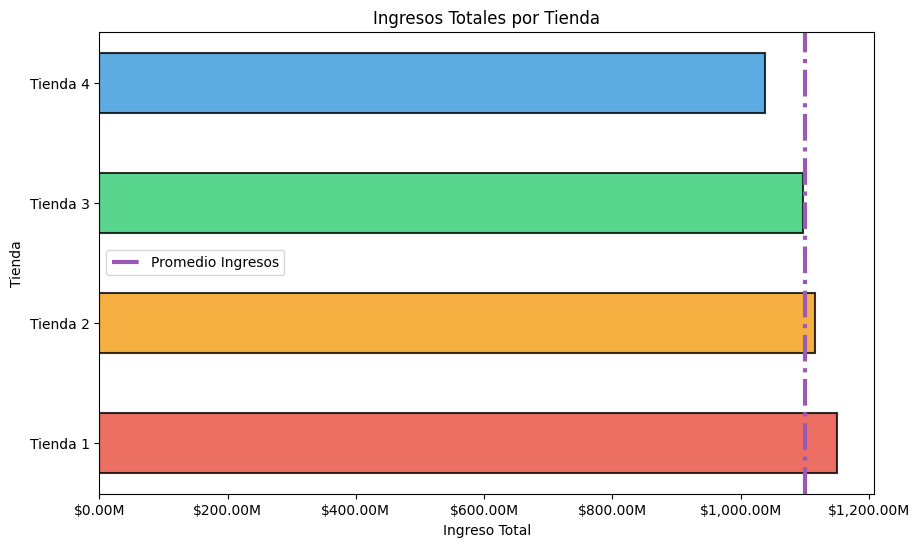

In [42]:
sum_stores = [calcular_total_vendido(store) for store in stores]

plt.figure(figsize=(10, 6))
plt.axvline(promedio_ingresos, color='#9b59b6', linestyle='-.', linewidth=3, label='Promedio Ingresos')
plt.legend()
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Tienda')
plt.xlabel('Ingreso Total')
escalax = ticker.FuncFormatter(lambda x, pos: '${:,.2f}M'.format(x/1e6))
plt.gca().xaxis.set_major_formatter(escalax)
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], sum_stores,
         color=['#e74c3c', '#f39c12', '#2ecc71', '#3498db'],
         alpha=0.8,
         edgecolor='black',
         linewidth=1.5,
         height=0.5)

## 2. Ventas por categoría:

In [11]:
def calcular_categorias(store,categoria):
    df1 = pd.DataFrame(store);
    return df1.groupby([categoria]).agg(
    cantidad_productos=(categoria, 'size'),
    cantidad_vendida=('Precio', 'sum'),
    );

resultados_store = {};
for i, store in enumerate(stores):
    resultados_store[f'Tienda {i+1}'] = calcular_categorias(store, 'Categoría del Producto');

for nombre_store, categorias in resultados_store.items():
    print(f"\n{nombre_store}:");
    categorias = categorias.sort_values(by='cantidad_vendida', ascending=False);
    categorias['cantidad_vendida'] = categorias['cantidad_vendida'].map('${:,.2f}'.format);
    print(categorias);



Tienda 1:
                         cantidad_productos cantidad_vendida
Categoría del Producto                                      
Electrónicos                            448  $429,493,500.00
Electrodomésticos                       312  $363,685,200.00
Muebles                                 465  $187,633,700.00
Instrumentos musicales                  182   $91,299,000.00
Deportes y diversión                    284   $39,290,000.00
Juguetes                                324   $17,995,700.00
Artículos para el hogar                 171   $12,698,400.00
Libros                                  173    $8,784,900.00

Tienda 2:
                         cantidad_productos cantidad_vendida
Categoría del Producto                                      
Electrónicos                            422  $410,831,100.00
Electrodomésticos                       305  $348,567,800.00
Muebles                                 442  $176,426,300.00
Instrumentos musicales                  224  $104,990,300.00
De

- Convertimos la información obtenida en un dataframe para mayor eficiencia.

In [12]:
def calcular_categorias(store,categoria):
    df = pd.DataFrame(store);
    return df.groupby([categoria]).agg(
    cantidad_productos=(categoria, 'size'),
    cantidad_vendida=('Precio', 'sum'),
    );

resultados_store = {};

for i, store in enumerate(stores):
    categorias = calcular_categorias(store, 'Categoría del Producto');
    categorias['Tienda'] = f'Tienda {i+1}';
    categorias = categorias.reset_index();
    resultados_store[f'Tienda {i+1}'] = categorias;

df1 = pd.concat(resultados_store.values(), ignore_index=True);

df1['cantidad_vendida'] = df1['cantidad_vendida'].map('{:,.2f}'.format);
print(df1);

     Categoría del Producto  cantidad_productos cantidad_vendida    Tienda
0   Artículos para el hogar                 171    12,698,400.00  Tienda 1
1      Deportes y diversión                 284    39,290,000.00  Tienda 1
2         Electrodomésticos                 312   363,685,200.00  Tienda 1
3              Electrónicos                 448   429,493,500.00  Tienda 1
4    Instrumentos musicales                 182    91,299,000.00  Tienda 1
5                  Juguetes                 324    17,995,700.00  Tienda 1
6                    Libros                 173     8,784,900.00  Tienda 1
7                   Muebles                 465   187,633,700.00  Tienda 1
8   Artículos para el hogar                 181    14,746,900.00  Tienda 2
9      Deportes y diversión                 275    34,744,500.00  Tienda 2
10        Electrodomésticos                 305   348,567,800.00  Tienda 2
11             Electrónicos                 422   410,831,100.00  Tienda 2
12   Instrumentos musical

- Gráfica de Cantidad de productos vendidos por Categoría y Tienda:

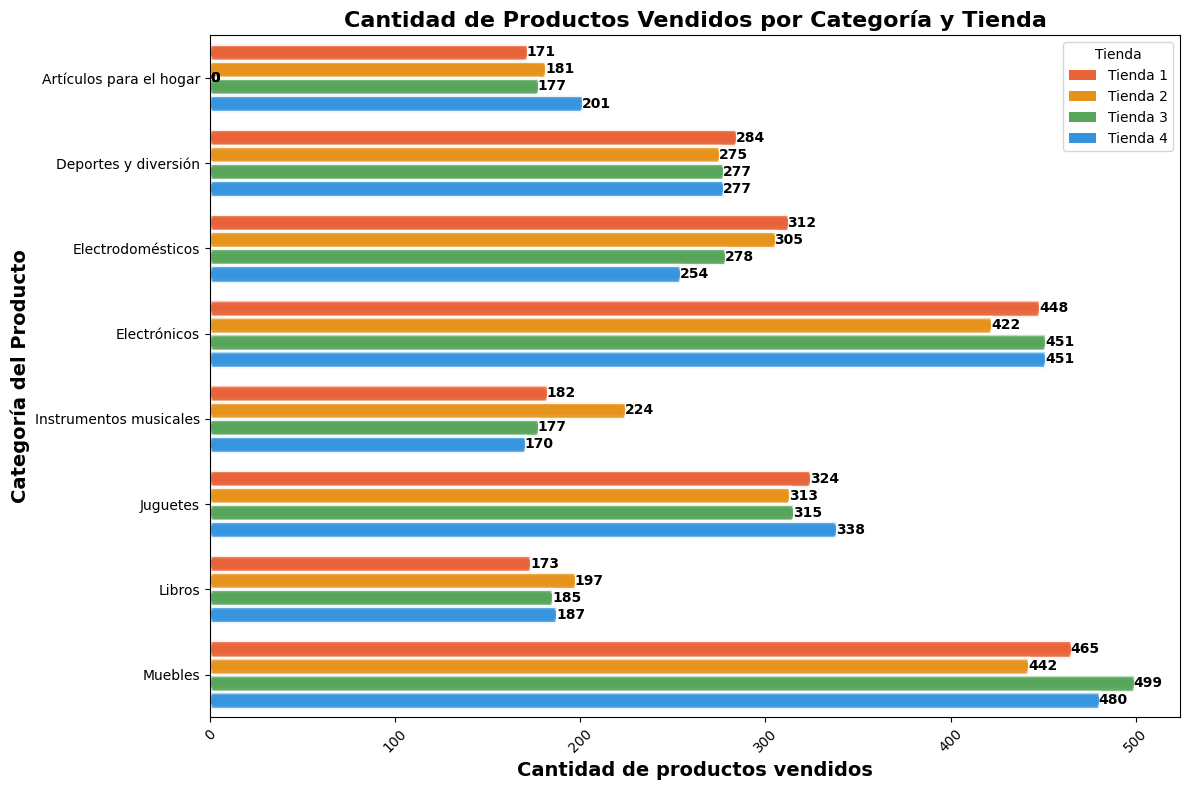

In [44]:

df1['cantidad_productos'] = df1['cantidad_productos'].astype(float)

plt.figure(figsize=(12, 8))

ax = sns.barplot(
    data=df1,
    y='Categoría del Producto',
    x='cantidad_productos',
    hue='Tienda',
    palette=['#FF5722', '#FF9800', '#4CAF50', '#2196F3'],
    saturation=0.8
)

import matplotlib.patches as patches

for i, barra in enumerate(ax.patches):
    cantidad = barra.get_width()


    altura = barra.get_height()
    y_pos = barra.get_y()

    for j in range(3):
        alpha_val = 0.3 + (j * 0.2)
        rect_height = altura * (0.8 - j * 0.2)
        rect_y = y_pos + (altura - rect_height) / 2

        rect = patches.Rectangle(
            (0, rect_y), cantidad, rect_height,
            facecolor=barra.get_facecolor(),
            alpha=alpha_val,
            zorder=1
        )
        ax.add_patch(rect)

    barra.set_edgecolor('white')
    barra.set_linewidth(2.5)
    barra.set_alpha(0.9)

    ax.text(cantidad, barra.get_y() + barra.get_height()/2,
            f'{cantidad:,.0f}', va='center', ha='left', fontsize=10,
            color='black', fontweight='bold')

plt.title('Cantidad de Productos Vendidos por Categoría y Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de productos vendidos', fontsize=14, fontweight='bold')
plt.ylabel('Categoría del Producto', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Gráfica de Total de Producto Vendido respecto Categoría y tienda:

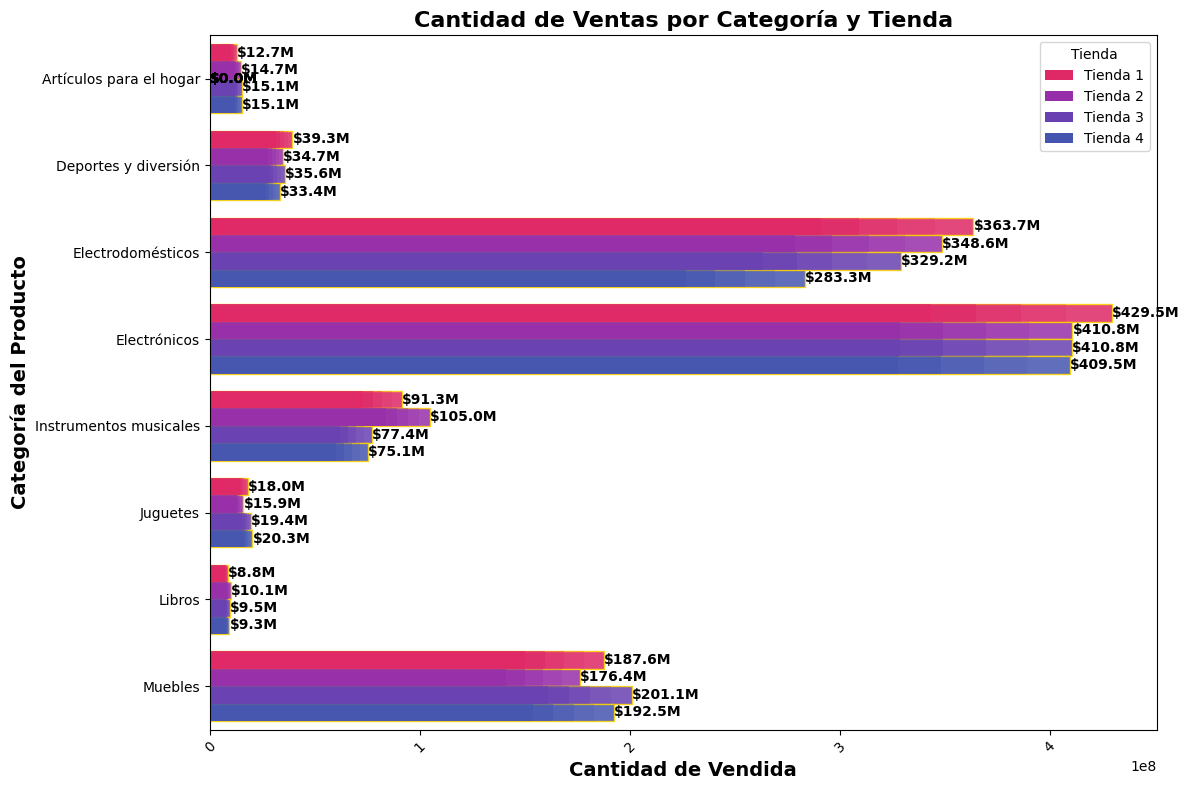

In [53]:
df1['cantidad_vendida'] = pd.to_numeric(df1['cantidad_vendida'].astype(str).str.replace(',', ''), errors='coerce')

plt.figure(figsize=(12, 8))

# Paleta de colores gradiente vibrante
ax = sns.barplot(
    data=df1,
    y='Categoría del Producto',
    x='cantidad_vendida',
    hue='Tienda',
    palette=['#E91E63', '#9C27B0', '#673AB7', '#3F51B5'],
    saturation=0.9
)

for i, barra in enumerate(ax.patches):
    cantidad = barra.get_width()

    altura = barra.get_height()
    y_pos = barra.get_y()

    for j in range(4):
        alpha_val = 0.2 + (j * 0.15)
        rect_width = cantidad * (0.95 - j * 0.05)

        rect = patches.Rectangle(
            (0, y_pos), rect_width, altura,
            facecolor=barra.get_facecolor(),
            alpha=alpha_val,
            zorder=1
        )
        ax.add_patch(rect)

    barra.set_edgecolor('gold')
    barra.set_linewidth=3
    barra.set_alpha(0.85)

    ax.text(cantidad, barra.get_y() + barra.get_height()/2,
            f'${cantidad/1e6:,.1f}M', va='center', ha='left', fontsize=10,
            color='black', fontweight='bold')

plt.title('Cantidad de Ventas por Categoría y Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Vendida', fontsize=14, fontweight='bold')
plt.ylabel('Categoría del Producto', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Calificación promedio de la tienda:

- Lista de la Calificacion de los productos respecto a Categoría y Tienda:

In [17]:
def calcular_categorias(store,calificación):
    df2 = pd.DataFrame(store);
    return df2.groupby(['Categoría del Producto']).agg(
    calidad_prod=(calificación, 'size'),
    suma_cal=('Calificación', 'sum'),
    promedio_cal=('Calificación', 'mean'),
    );

calificacion_store = {};

for e, store in enumerate(stores):
    calificacion_store[f'Tienda {e+1}'] = calcular_categorias(store, 'Calificación');

for nombre_store, calificaciones in calificacion_store.items():
    print(f"\n{nombre_store}:");
    calificaciones = calificaciones.sort_values(by='promedio_cal', ascending=False);
    calificaciones['promedio_cal'] = calificaciones['promedio_cal'].map('{:,.2f}'.format);
    print(calificaciones);


Tienda 1:
                         calidad_prod  suma_cal promedio_cal
Categoría del Producto                                      
Juguetes                          324      1321         4.08
Instrumentos musicales            182       737         4.05
Electrodomésticos                 312      1258         4.03
Electrónicos                      448      1794         4.00
Libros                            173       688         3.98
Muebles                           465      1835         3.95
Deportes y diversión              284      1107         3.90
Artículos para el hogar           171       641         3.75

Tienda 2:
                         calidad_prod  suma_cal promedio_cal
Categoría del Producto                                      
Muebles                           442      1809         4.09
Electrodomésticos                 305      1242         4.07
Artículos para el hogar           181       737         4.07
Deportes y diversión              275      1118         4.07
In

- Convertimos la información obtenida en un dataframe para mayor eficiencia:

In [18]:
def calcular_categorias(store,calificación):
    df2 = pd.DataFrame(store);
    return df2.groupby(['Categoría del Producto']).agg(
    calidad_prod=(calificación, 'size'),
    suma_cal=('Calificación', 'sum'),
    promedio_cal=('Calificación', 'mean'),
    );

calificacion_store = {};

for e, store in enumerate(stores):
    calificaciones = calcular_categorias(store, 'Categoría del Producto');
    calificaciones['Tienda'] = f'Tienda {e+1}';
    calificaciones = calificaciones.reset_index();
    calificacion_store[f'Tienda {e+1}'] = calificaciones;

df2 = pd.concat(calificacion_store.values(), ignore_index=True);

df2['promedio_cal'] = df2['promedio_cal'].map('{:,.2f}'.format)
print(df2)

     Categoría del Producto  calidad_prod  suma_cal promedio_cal    Tienda
0   Artículos para el hogar           171       641         3.75  Tienda 1
1      Deportes y diversión           284      1107         3.90  Tienda 1
2         Electrodomésticos           312      1258         4.03  Tienda 1
3              Electrónicos           448      1794         4.00  Tienda 1
4    Instrumentos musicales           182       737         4.05  Tienda 1
5                  Juguetes           324      1321         4.08  Tienda 1
6                    Libros           173       688         3.98  Tienda 1
7                   Muebles           465      1835         3.95  Tienda 1
8   Artículos para el hogar           181       737         4.07  Tienda 2
9      Deportes y diversión           275      1118         4.07  Tienda 2
10        Electrodomésticos           305      1242         4.07  Tienda 2
11             Electrónicos           422      1676         3.97  Tienda 2
12   Instrumentos musical

- Grafico de la Calificación promedio por Categoria y Tienda:

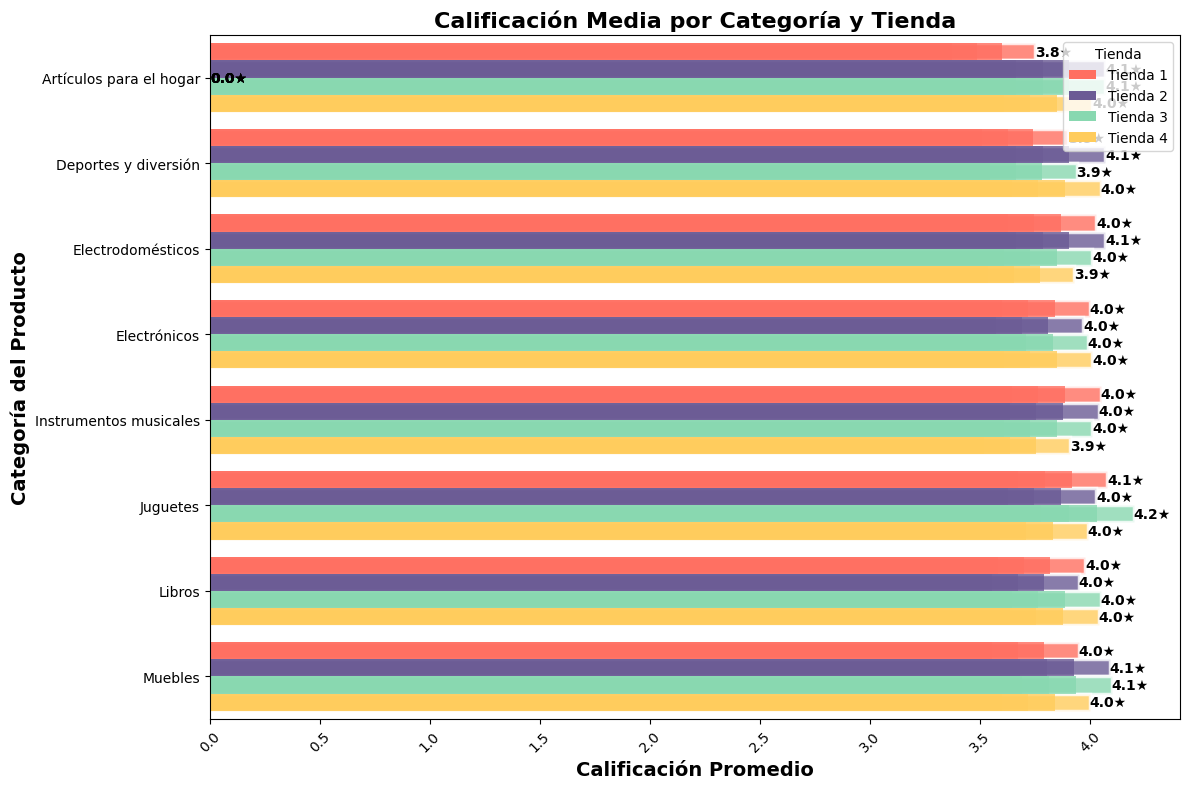

In [50]:
df2['promedio_cal'] = df2['promedio_cal'].astype(float)

plt.figure(figsize=(12, 8))

# Paleta de colores cálidos para calificaciones
ax1 = sns.barplot(
    data=df2,
    y='Categoría del Producto',
    x='promedio_cal',
    hue='Tienda',
    palette=['#FF6F61', '#6B5B95', '#88D8B0', '#FFCC5C'],
    saturation=1.0
)

# Hacer las barras más dinámicas con efectos visuales
import matplotlib.patches as patches

for i, barra1 in enumerate(ax1.patches):
    cantidad1 = barra1.get_width()

    # Crear efecto de gradiente brillante
    altura = barra1.get_height()
    y_pos = barra1.get_y()

    # Efecto de brillo con múltiples capas
    for j in range(3):
        alpha_val = 0.4 + (j * 0.2)
        rect_width = cantidad1 * (0.9 + j * 0.03)

        rect = patches.Rectangle(
            (0, y_pos), rect_width, altura,
            facecolor=barra1.get_facecolor(),
            alpha=alpha_val,
            zorder=1
        )
        ax1.add_patch(rect)

    # Bordes elegantes
    barra1.set_edgecolor('white')
    barra1.set_linewidth(2.5)
    barra1.set_alpha(0.8)

    # Texto con formato de calificación
    ax1.text(cantidad1, barra1.get_y() + barra1.get_height()/2,
            f'{cantidad1:.1f}★', va='center', ha='left', fontsize=10,
            color='black', fontweight='bold')

plt.title('Calificación Media por Categoría y Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Calificación Promedio', fontsize=14, fontweight='bold')
plt.ylabel('Categoría del Producto', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Lista del Promedio General por Categoría:

In [20]:
df2['promedio_cal'] = pd.to_numeric(df2['promedio_cal'], errors='coerce');

promedio_categoria = df2.groupby('Categoría del Producto')['promedio_cal'].mean().reset_index();
print(promedio_categoria);

    Categoría del Producto  promedio_cal
0  Artículos para el hogar        3.9750
1     Deportes y diversión        3.9900
2        Electrodomésticos        4.0100
3             Electrónicos        3.9925
4   Instrumentos musicales        4.0025
5                 Juguetes        4.0750
6                   Libros        4.0050
7                  Muebles        4.0350


- Gráfica del Promedio General por Categoría:

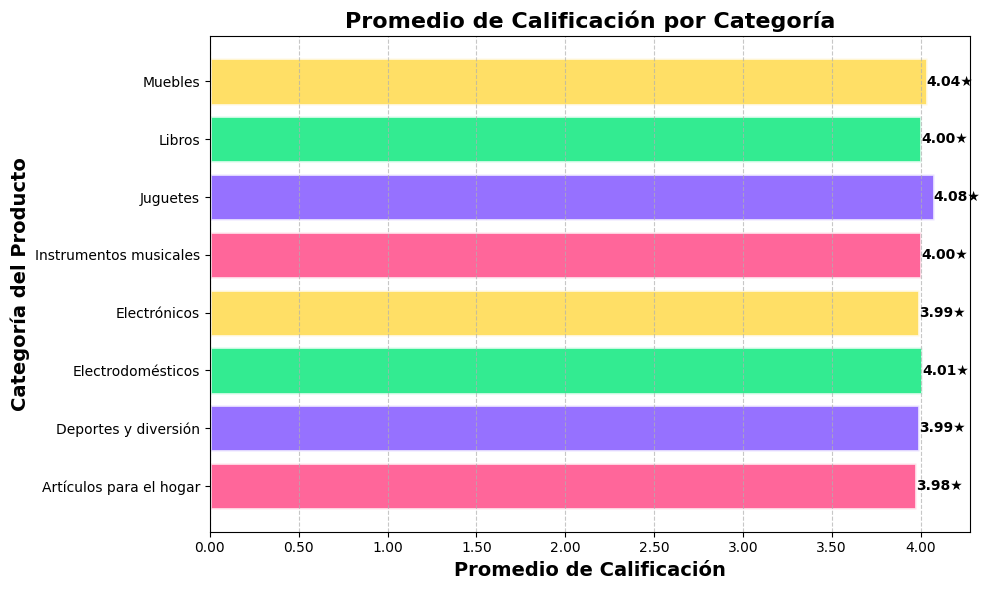

In [54]:
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.barh(promedio_categoria['Categoría del Producto'], promedio_categoria['promedio_cal'],
         color=['#FF4081', '#7C4DFF', '#00E676', '#FFD740'], alpha=0.8, edgecolor='white', linewidth=2)

for i, v in enumerate(promedio_categoria['promedio_cal']):
    ax2.text(v, i, f'{v:.2f}★', va='center', ha='left', fontsize=10, color='black', fontweight='bold')

ax2.set_title('Promedio de Calificación por Categoría', fontsize=16, fontweight='bold')
ax2.set_xlabel('Promedio de Calificación', fontsize=14, fontweight='bold')
ax2.set_ylabel('Categoría del Producto', fontsize=14, fontweight='bold')
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
ax2.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Lista del Promedio General por Tienda:

In [22]:
promedio_calificaciones = df2.groupby('Tienda')['promedio_cal'].mean().reset_index();
print(promedio_calificaciones);

     Tienda  promedio_cal
0  Tienda 1       3.96750
1  Tienda 2       4.03625
2  Tienda 3       4.04625
3  Tienda 4       3.99250


- Gráfica del Promedio General por Tienda:

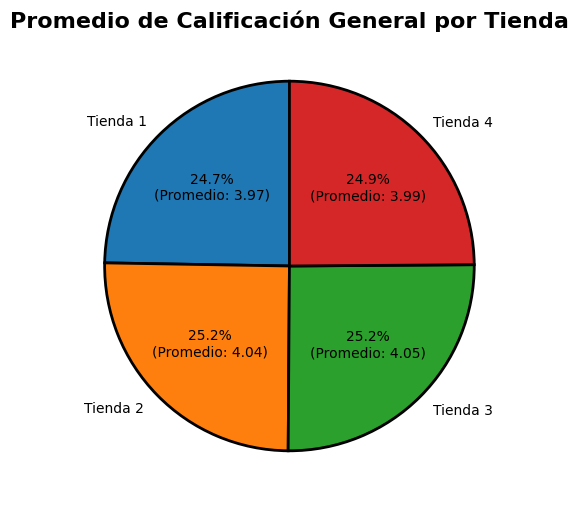

In [23]:
fig, ax3 = plt.subplots(figsize=(10, 6));
wedges, texts, autotexts = ax3.pie(
    promedio_calificaciones['promedio_cal'],
    labels=promedio_calificaciones['Tienda'],
    autopct='%1.1f%%',
    startangle=90,
    textprops=dict(color="black"),
    wedgeprops=dict(linewidth=2, edgecolor='#000000')
)

ax3.set_title('Promedio de Calificación General por Tienda', fontsize=16, fontweight='bold');

for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{autotext.get_text()}\n(Promedio: {promedio_calificaciones["promedio_cal"][i]:.2f})');


## 4. Productos más y menos vendidos:

- Lista de los Producos Más y Menos Vendidos por Tienda:

In [25]:
def calcular_ventas(store):
    df3 = pd.DataFrame(store);
    ventas = df3.groupby(['Producto'])['Producto'].count().reset_index(name='cantidad_vendida');
    mas_vendidos = ventas.sort_values(by='cantidad_vendida', ascending=False).head(3);
    menos_vendidos = ventas.sort_values(by='cantidad_vendida', ascending=True).head(3);
    return mas_vendidos, menos_vendidos;

for l, store in enumerate(stores):
    mas_vendidos, menos_vendidos = calcular_ventas(store);
    print(f"\nTienda {l+1} - Productos más vendidos:");
    print(mas_vendidos[['Producto', 'cantidad_vendida']].to_string(index=False));
    print(f"\nTienda {l+1} - Productos menos vendidos:");
    print(menos_vendidos[['Producto', 'cantidad_vendida']].to_string(index=False));


Tienda 1 - Productos más vendidos:
     Producto  cantidad_vendida
      Armario                60
TV LED UHD 4K                60
   Microondas                60

Tienda 1 - Productos menos vendidos:
                 Producto  cantidad_vendida
Auriculares con micrófono                33
             Celular ABXY                33
          Olla de presión                35

Tienda 2 - Productos más vendidos:
                 Producto  cantidad_vendida
Iniciando en programación                65
               Microondas                62
                  Batería                61

Tienda 2 - Productos menos vendidos:
       Producto  cantidad_vendida
  Juego de mesa                32
      Impresora                34
Mesa de comedor                34

Tienda 3 - Productos más vendidos:
       Producto  cantidad_vendida
  Kit de bancas                57
Mesa de comedor                56
      Cama king                56

Tienda 3 - Productos menos vendidos:
               Producto  c

- Convertimos la información obtenida en un dataframe para mayor eficiencia:

In [26]:
def calcular_ventas(store):
    df3 = pd.DataFrame(store);
    ventas = df3.groupby(['Producto'])['Producto'].count().reset_index(name='cantidad_vendida');
    mas_vendidos = ventas.sort_values(by='cantidad_vendida', ascending=False).head(3);
    menos_vendidos = ventas.sort_values(by='cantidad_vendida', ascending=True).head(3);
    return mas_vendidos, menos_vendidos;

mas_vendidos_list = [];
menos_vendidos_list = [];

for l, store in enumerate(stores):
    mas_vendidos, menos_vendidos = calcular_ventas(store);
    mas_vendidos['Tienda'] = f'Tienda {l+1}';
    menos_vendidos['Tienda'] = f'Tienda {l+1}';
    mas_vendidos['Tipo'] = 'Más vendidos';
    menos_vendidos['Tipo'] = 'Menos vendidos';
    mas_vendidos_list.append(mas_vendidos);
    menos_vendidos_list.append(menos_vendidos);

df3 = pd.concat(mas_vendidos_list + menos_vendidos_list, ignore_index=True);

print(df3)

                     Producto  cantidad_vendida    Tienda            Tipo
0                     Armario                60  Tienda 1    Más vendidos
1               TV LED UHD 4K                60  Tienda 1    Más vendidos
2                  Microondas                60  Tienda 1    Más vendidos
3   Iniciando en programación                65  Tienda 2    Más vendidos
4                  Microondas                62  Tienda 2    Más vendidos
5                     Batería                61  Tienda 2    Más vendidos
6               Kit de bancas                57  Tienda 3    Más vendidos
7             Mesa de comedor                56  Tienda 3    Más vendidos
8                   Cama king                56  Tienda 3    Más vendidos
9                    Cama box                62  Tienda 4    Más vendidos
10                 Cubertería                59  Tienda 4    Más vendidos
11                  Cama king                56  Tienda 4    Más vendidos
12  Auriculares con micrófono         

- Gráfica de los Productos Más y Menos Vendidos por Tienda:

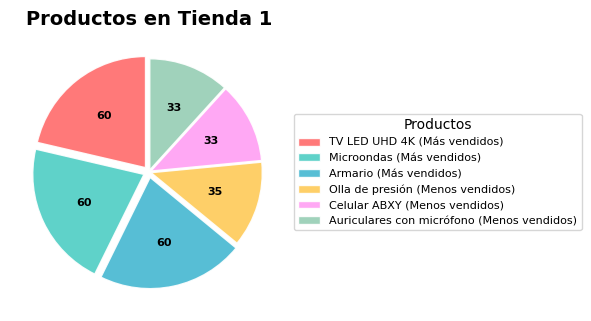

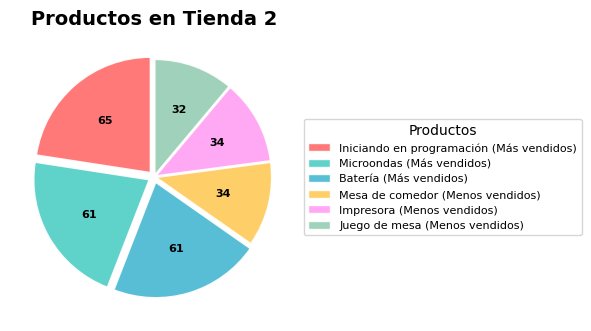

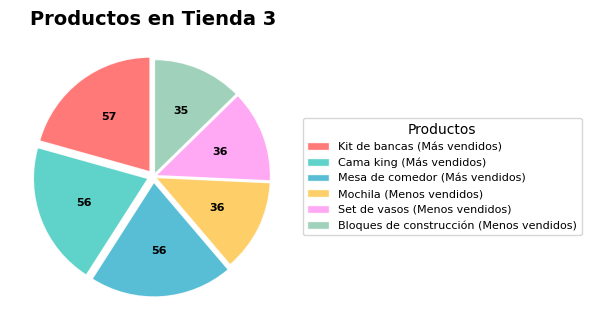

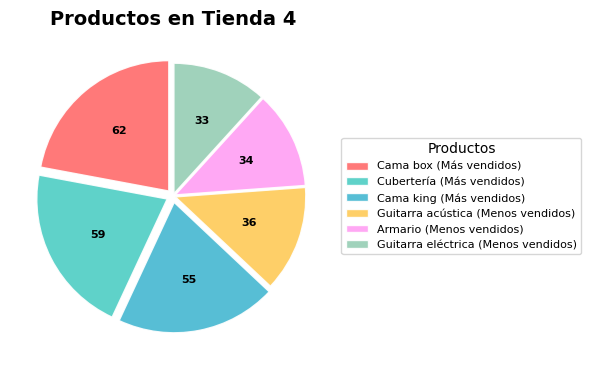

In [61]:
for idx in range(len(mas_vendidos_list)):
    mas_vendidos = mas_vendidos_list[idx]
    menos_vendidos = menos_vendidos_list[idx]

    productos = list(mas_vendidos['Producto']) + list(menos_vendidos['Producto'])
    cantidades = list(mas_vendidos['cantidad_vendida']) + list(menos_vendidos['cantidad_vendida'])
    tipos = ['Más vendidos'] * len(mas_vendidos) + ['Menos vendidos'] * len(menos_vendidos)
    tienda = mas_vendidos['Tienda'].iloc[0]

    fig, ax = plt.subplots(figsize=(6, 6))
    def funcion_plot(pct, allvals):
        absolute = int(pct / 100. * sum(allvals))
        return f'{absolute}'

    orden = np.argsort(cantidades)[::-1]
    cantidades = [cantidades[i] for i in orden]
    productos = [productos[i] for i in orden]
    tipos = [tipos[i] for i in orden]

    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FECA57', '#FF9FF3', '#96CEB4']
    explode = [0.05 if tipo == 'Más vendidos' else 0.02 for tipo in tipos]

    wedges, texts, autotexts = ax.pie(
        cantidades,
        autopct=lambda pct: funcion_plot(pct, cantidades),
        startangle=90,
        colors=colores,
        explode=explode,
        textprops=dict(color="black", fontsize=9),
        wedgeprops=dict(linewidth=1, edgecolor="white", alpha=0.9)
    )

    ax.legend(wedges, [f"{p} ({t})" for p, t in zip(productos, tipos)],
              title="Productos",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1),
              fontsize=8)

    ax.set_title(f'Productos en {tienda}', fontsize=14, fontweight='bold')
    for i, autotext in enumerate(autotexts):
        autotext.set_text(f'{autotext.get_text()}')
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(8)
    plt.tight_layout()
    plt.show()

## 5. Envío promedio por tienda:

- Gastos de Envío Totales por Tienda:

In [28]:
stores = [tienda1, tienda2, tienda3, tienda4];
sum_stores = [];

def gastos_envio(store):
    df4 = pd.DataFrame(store);
    return df4['Costo de envío'].sum();

for i, store in enumerate(stores):
    envio = gastos_envio(store);
    print(f"Gastos de Envio Tienda {i+1}: ${envio:,.2f}");

Gastos de Envio Tienda 1: $61,377,900.00
Gastos de Envio Tienda 2: $59,485,100.00
Gastos de Envio Tienda 3: $58,516,600.00
Gastos de Envio Tienda 4: $55,317,400.00


- Promedio de los Gastos totales de las 4 Tiendas:

In [29]:
promedio_gastos_envio = sum([gastos_envio(store) for store in stores]) / len(stores);
print(f"Promedio de Gastos de Envío Totales: ${promedio_gastos_envio:,.2f}");

Promedio de Gastos de Envío Totales: $58,674,250.00


- Gráfica de Gasto de Envío por Tienda:

<BarContainer object of 4 artists>

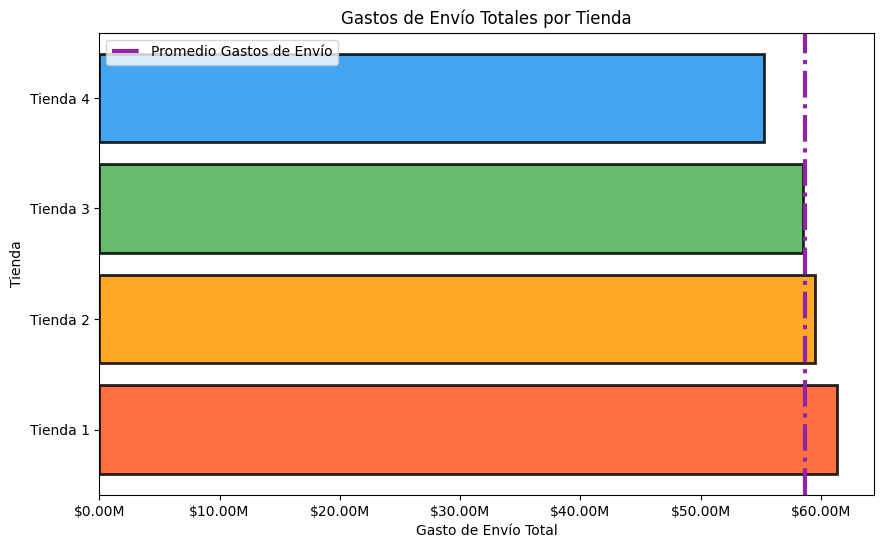

In [58]:
sum_stores = [gastos_envio(store) for store in stores]

plt.figure(figsize=(10, 6))
plt.axvline(promedio_gastos_envio, color='#8E24AA', linestyle='-.', linewidth=3, label='Promedio Gastos de Envío')
plt.legend()
plt.title('Gastos de Envío Totales por Tienda')
plt.ylabel('Tienda')
plt.xlabel('Gasto de Envío Total')
escalax = ticker.FuncFormatter(lambda x, pos: '${:,.2f}M'.format(x/1e6))
plt.gca().xaxis.set_major_formatter(escalax)
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], sum_stores,
         color=['#FF5722', '#FF9800', '#4CAF50', '#2196F3'],
         alpha=0.85,
         edgecolor='black',
         linewidth=2)

- Calculamos el Ingreso Neto por Tienda:

Recordemos que el ingreso neto es el ingreso por tienda menos el valor total del envio.

In [31]:
ingreso_neto = [calcular_total_vendido(store) - gastos_envio(store) for store in stores]
print("Ingreso Neto por Tienda:");
for i, neto in enumerate(ingreso_neto):
    print(f"Tienda {i+1}: ${neto:,.2f}");

Ingreso Neto por Tienda:
Tienda 1: $1,089,502,500.00
Tienda 2: $1,056,858,400.00
Tienda 3: $1,039,503,000.00
Tienda 4: $983,058,300.00


- Promedio de los Ingresos Netos de las 4 Tiendas:

In [32]:
promedio_neto = sum(ingreso_neto) / len(ingreso_neto);
print(f"Promedio de Ingresos Netos Totales: ${promedio_neto:,.2f}");

Promedio de Ingresos Netos Totales: $1,042,230,550.00


- Gráfica de Ingresos Netos por Tienda:

<BarContainer object of 4 artists>

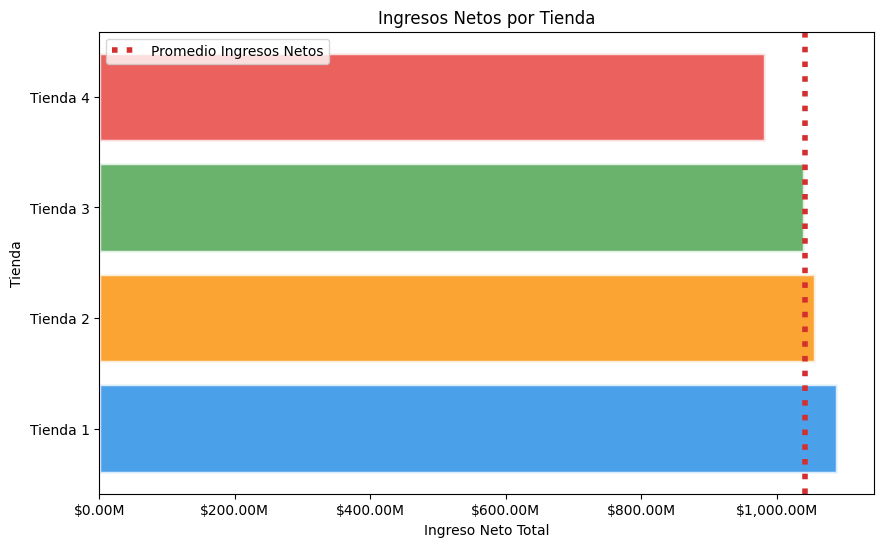

In [60]:
sum_stores = ingreso_neto

plt.figure(figsize=(10, 6))
plt.axvline(promedio_neto, color='#D32F2F', linestyle=':', linewidth=4, label='Promedio Ingresos Netos')
plt.legend()
plt.title('Ingresos Netos por Tienda')
plt.ylabel('Tienda')
plt.xlabel('Ingreso Neto Total')
escalax = ticker.FuncFormatter(lambda x, pos: '${:,.2f}M'.format(x/1e6))
plt.gca().xaxis.set_major_formatter(escalax)
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], sum_stores,
         color=['#1E88E5', '#FB8C00', '#43A047', '#E53935'],
         alpha=0.8,
         edgecolor='white',
         linewidth=2.5)

- En conclusión:

In [34]:
print("La Tienda con mayor ingreso neto es la Tienda", ingreso_neto.index(max(ingreso_neto)) + 1, f"con un ingreso neto total de ${max(ingreso_neto):,.2f}.")
print("Y la Tienda con menor ingreso neto es la Tienda", ingreso_neto.index(min(ingreso_neto)) + 1, f"con un ingreso neto total de ${min(ingreso_neto):,.2f}.")


La Tienda con mayor ingreso neto es la Tienda 1 con un ingreso neto total de $1,089,502,500.00.
Y la Tienda con menor ingreso neto es la Tienda 4 con un ingreso neto total de $983,058,300.00.


### Análisis General:

Basándome en el análisis exhaustivo de los datos financieros y operacionales, mi sugerencia para el Sr. Juan es proceder con la venta de la Tienda 4. Esta decisión se fundamenta en los siguientes aspectos críticos:
Indicadores de bajo rendimiento:

Rendimiento financiero deficiente: Esta sucursal registra el volumen de ventas más reducido del portafolio, limitando significativamente el retorno de inversión esperado.
Experiencia del cliente comprometida: Los niveles de satisfacción se sitúan en la segunda posición más baja, señalando problemas en la calidad del servicio que pueden erosionar la base de clientes a futuro.
Eficiencia operativa insuficiente: Pese a mantener gastos logísticos reducidos, estos ahorros no logran compensar las deficiencias en generación de ingresos.

Perspectiva estratégica:
La Tienda 4 presenta un perfil de negocio poco sostenible, con indicadores que apuntan hacia una operación con mix de productos inestable y una trayectoria descendente en la percepción del cliente. Esta situación la posiciona como el activo menos estratégico dentro del portafolio empresarial del Sr. Juan.
La enajenación de este establecimiento permitirá optimizar recursos y enfocar esfuerzos en las unidades de negocio con mayor potencial de crecimiento y rentabilidad.
Consideraciones adicionales post-venta:

Implementar un sistema de monitoreo para la Tienda 1, cuyas métricas muestran signos de declive que requieren atención inmediata.
Desarrollar un plan de mejora en la experiencia del cliente para abordar las calificaciones subóptimas en todas las ubicaciones.
Diseñar una estrategia comercial orientada a promover productos de mayor margen y valor agregado en las tiendas retenidas.